In [2]:
#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")
#BiocManager::install("ComplexHeatmap")
# install.packages(c('ClusterR','tidyverse'))
suppressMessages(require(ComplexHeatmap))
suppressMessages(require(tidyverse))
suppressMessages(require(data.table))
require(RColorBrewer)
require(ClusterR)
require(pracma)

In [3]:
(dat <- fread('../data_processed/plot_dat.csv') %>%column_to_rownames('V1')) %>%  head(1)
dat %>% dim

,0.5_867451,0.5_867454,0.5_867457,0.5_867478,0.5_867481,0.5_867484,1_926614,1_494014,1_494017,1_494020,⋯,7_685178,7_685217,7_821662,7_823408,7_839434,7_839446,7_833455,7_840319,7_834112,7_995287
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
March1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] 10564    74

In [7]:
(glist <- fread("bootstrap_features_selected.csv", header = T) %>% column_to_rownames("gene")) %>% 
    head(1)

,counts,avg_weight,std_weight
,<int>,<dbl>,<dbl>
Cdca5,100,0.119316,0.06750173


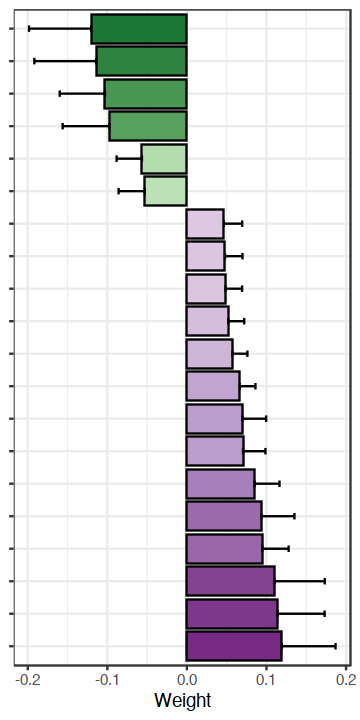

In [71]:
options(repr.plot.width = 3, repr.plot.height = 6)

p.weight_bar = ggplot(glist %>% rownames_to_column("gene") %>% mutate(gene = factor(gene, 
    levels = glist %>% rownames)), aes(gene, avg_weight, fill = avg_weight)) + geom_bar(stat = "identity", 
    color = "black") + scale_fill_distiller(palette = "PRGn") + geom_errorbar(aes(ymin = avg_weight, 
    ymax = ifelse(avg_weight > 0, avg_weight + std_weight, avg_weight - std_weight)), 
    width = 0.2, position = position_dodge(0.9)) + coord_flip() + theme_bw() + theme(legend.position = "none", 
    axis.text.y = element_blank(), axis.title.y = element_blank()) + ylab(label = "Weight")
p.weight_bar

In [61]:
?pheatmap

In [66]:
(glist$avg_weight %>% rev)

[1] -0.12019512 -0.11408987 -0.10295355 -0.09749518 -0.05652159 -0.05288572
 [7]  0.04645013  0.04784758  0.04849200  0.05198733  0.05728665  0.06648762
[13]  0.06980051  0.07055774  0.08510978  0.09374796  0.09472059  0.11013424
[19]  0.11416122  0.11931600

Warning message:
“The input is a data frame, convert it to the matrix.”


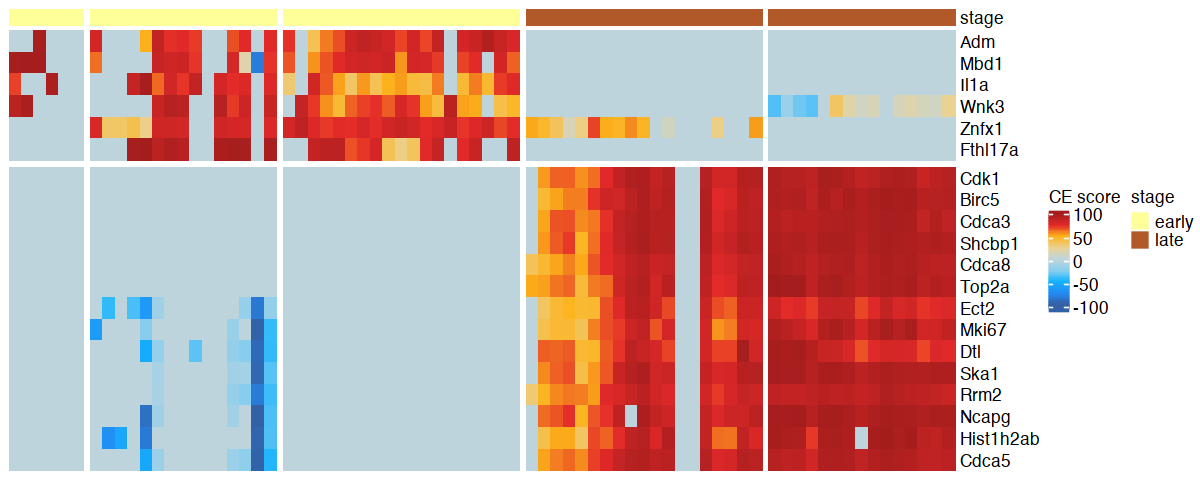

In [72]:
options(repr.plot.width = 10, repr.plot.height = 4)
pal_atac <- colorRampPalette(c("#3361A5", "#248AF3", "#14B3FF", "#88CEEF", "#C1D5DC", 
    "#EAD397", "#FDB31A", "#E42A2A", "#A31D1D"))(100)
col.gap = dat %>% colnames %>% sapply(., function(x) (strsplit(x, split = "_") %>% 
    unlist)[1]) %>% table %>% cumsum

df_col_anno = data.frame(col_name = dat %>% colnames) %>% separate(col_name, c("time", 
    "s"), remove = F, sep = "_") %>% mutate(stage = ifelse(time %in% c("0.5", "1", 
    "2"), "early", "late")) %>% select(-s) %>% column_to_rownames("col_name")

pheatmap(dat[glist %>% rownames %>% rev, ], annotation_col = df_col_anno %>% select(-time), 
    name = "CE score", annotation_colors = list(stage = c(early = brewer.pal(n = 12, 
        "Paired")[11], late = brewer.pal(n = 12, "Paired")[12])), show_colnames = F, 
    border_color = NA, gaps_col = col.gap, scale = "none", color = pal_atac, cluster_rows = F, 
    cluster_cols = F, show_rownames = T, gaps_row = which((glist$avg_weight %>% rev) > 
        0)[1] - 1)

Warning message:
“The input is a data frame, convert it to the matrix.”


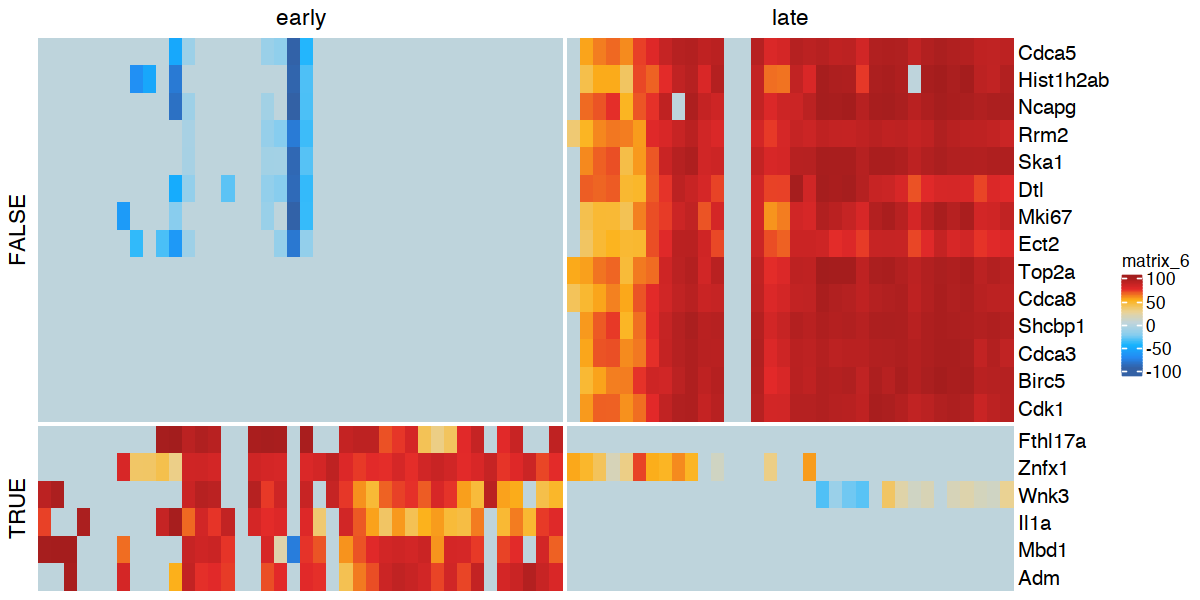

In [41]:
Heatmap(dat[glist %>% rownames, ], cluster_rows = F, cluster_columns = F, col = pal_atac, 
    show_column_names = F, column_split = df_col_anno$stage, row_split = glist$avg_weight < 
        0)

In [42]:
?anno_barplot